In [287]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

def gauss(x, y, mux, muy, sigmax, sigmay):
    sigma2 = sigmax*sigmay
    return 1.0/np.sqrt(2*np.pi*sigma2) * np.exp( -0.5*(x-mux)**2/(sigmax**2) - 0.5*(y-muy)**2/(sigmay**2) )



In [292]:
pos = np.fromfile(open('/Users/timrudge/Code/InfoTracking/pos.np','rt'), sep=',')
mxll = np.fromfile(open('/Users/timrudge/Code/InfoTracking/mxll.np','rt'), sep=',')
ll = np.fromfile(open('/Users/timrudge/Code/InfoTracking/ll.np','rt'), sep=',')
llself = np.fromfile(open('/Users/timrudge/Code/InfoTracking/llself.np','rt'), sep=',')
roi1 = np.fromfile(open('/Users/timrudge/Code/InfoTracking/roi1.np','rt'), sep=',')
roi2 = np.fromfile(open('/Users/timrudge/Code/InfoTracking/roi2.np','rt'), sep=',')
roi2_shifted = np.fromfile(open('/Users/timrudge/Code/InfoTracking/roi2_shifted.np','rt'), sep=',')


In [289]:
print pos.shape
print ll.shape
print roi.shape
np.sqrt(900/4/10)

(4500,)
(506250,)
(31, 31, 2, 32, 32)


4.6904157598234297

In [293]:
gx,gy = 15,15
vv = 15
wx,wy = 64,64
nt = 10

x = np.arange(-vv/2,vv/2)
vy,vx = np.meshgrid(x,x)

pos = pos.reshape((gx,gy,nt,2))
mxll = mxll.reshape((gx,gy,nt))
ll = ll.reshape((gx,gy,nt,vv,vv))
llself = llself.reshape((gx,gy,nt,vv,vv))
roi1 = roi1.reshape((gx,gy,nt,wx,wy))
roi2 = roi2.reshape((gx,gy,nt,wx,wy))
roi2_shifted = roi2_shifted.reshape((gx,gy,nt,wx,wy))

[[ 320.  448.]
 [ 319.  443.]
 [ 320.  440.]
 [ 319.  438.]
 [ 320.  435.]
 [ 320.  432.]
 [ 318.  439.]
 [ 315.  446.]
 [ 314.  446.]
 [ 313.  446.]]
-1.14954996324 -0.141491272225


(array([ 1332.,     6.,    15.,    12.,    27.,    64.,   192.,   352.,
          229.,    21.]),
 array([ 0.        ,  0.32596387,  0.65192775,  0.97789162,  1.30385549,
         1.62981937,  1.95578324,  2.28174711,  2.60771099,  2.93367486,
         3.25963873]),
 <a list of 10 Patch objects>)

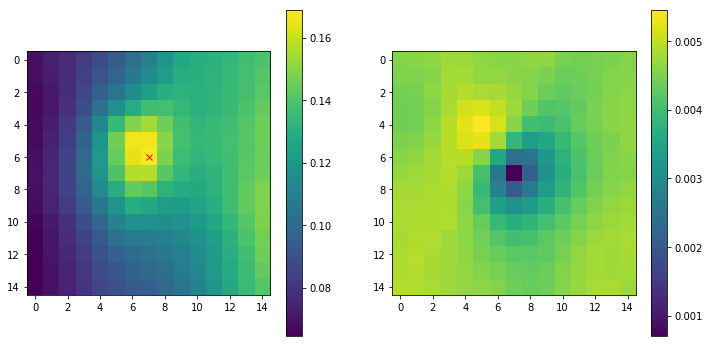

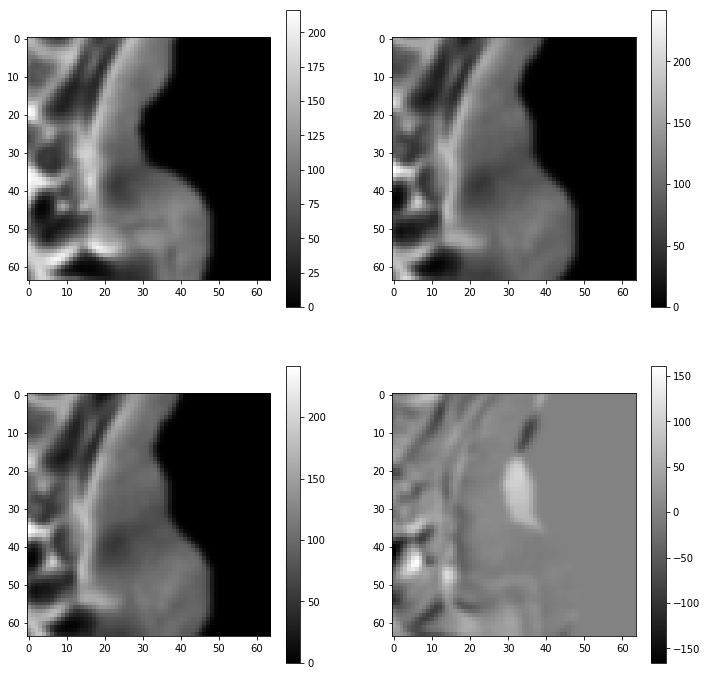

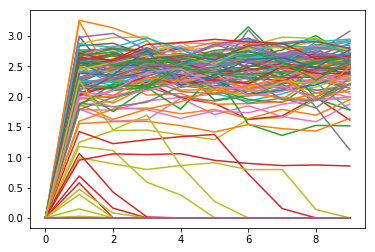

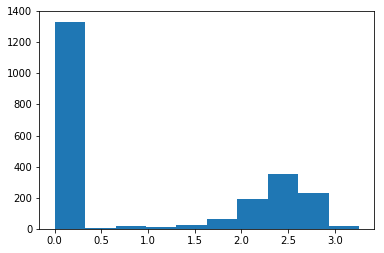

In [310]:
ix,iy,it = 5,7,9

print pos[ix,iy,:,:]
#print pos[ix,iy,it-1,:]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
H = ll[ix,iy,it,:,:]
plt.imshow(np.exp(H))
plt.colorbar()
plt.plot(pos[ix,iy,it,1]-pos[ix,iy,it-1,1]+7, pos[ix,iy,it,0]-pos[ix,iy,it-1,0]+7, 'rx')
#dHdy,dHdx = np.gradient(H)
#plt.quiver(-dHdx,dHdy)

w = np.exp(H)
mx = np.sum(vx*w)/np.sum(w)
my = np.sum(vy*w)/np.sum(w)

print mx,my

plt.subplot(1,2,2)
Hself = -llself[ix,iy,it,:,:]
eH = np.exp(H-Hself)
plt.imshow(eH/np.sum(eH))
plt.colorbar()

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(roi1[ix,iy,it,:,:], cmap='gray')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(roi2[ix,iy,it,:,:], cmap='gray')
plt.colorbar()


plt.subplot(2,2,3)
plt.imshow((roi2_shifted)[ix,iy,it,:,:], cmap='gray')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow((roi2_shifted-roi1)[ix,iy,it,:,:], cmap='gray')
plt.colorbar()

plt.figure()
plt.plot(-mxll.reshape((gx*gy,nt)).transpose())

plt.figure()
plt.hist(-mxll.reshape((gx*gy*nt)))

15.3707361887
5.34318808772 1.14953704409
45.8828675602 63.4695766359


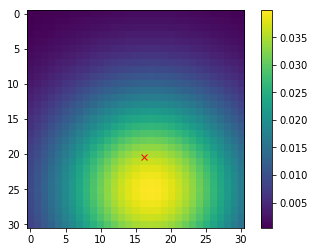

In [66]:
x = np.arange(-15,16)
vy,vx = np.meshgrid(x,x)

def gauss(x, y, mux, muy, sigmax, sigmay):
    sigma2 = sigmax*sigmay
    return 1.0/np.sqrt(2*np.pi*sigma2) * np.exp( -0.5*(x-mux)**2/(sigmax**2) - 0.5*(y-muy)**2/(sigmay**2) )

ell = gauss(vx,vy, 10,2, 10,10) 
#ell = np.exp(ll[ix,iy,it])
print(np.sum(ell))
sumll = np.sum(ell)
muzx = np.sum(vx*ell)/sumll
muzy = np.sum(vy*ell)/sumll
sigmazx = np.sum((vx-muzx)**2*ell)/sumll
sigmazy = np.sum((vx-muzy)**2*ell)/sumll
print muzx,muzy
print sigmazx,sigmazy
'''
for i in range(10):
    ell = np.exp(-ll[ix,iy,it])
    sumll = np.sum(ell*gauss(vx, vy, muzx, muzy, sigmazx, sigmazy))
    pz = gauss(vx, vy, muzx, muzy, sigmazx, sigmazy)
    muzx = np.sum(vx*ell*pz)/sumll
    muzy = np.sum(vy*ell*pz)/sumll
    sigmazx = np.sum((vx-muzx)**2*ell*pz)/sumll
    sigmazy = np.sum((vx-muzy)**2*ell*pz)/sumll
    print muzx,muzy
    print sigmazx,sigmazy
'''
    
H = ll[ix,iy,it,:,:]
plt.imshow(ell)
plt.colorbar()
plt.plot(muzy+15, muzx+15, 'rx')

In [8]:
from scipy.ndimage.filters import maximum_filter
maxima = maximum_filter(H-Hself,7)
maxpos = np.where(H-Hself==np.max(maxima))
print maxpos
plt.imshow(H-Hself==np.max(maxima))
vx,vy = maxpos[0][0]-15, maxpos[1][0]-15
print "velocity: ",vx,vy

NameError: name 'H' is not defined

In [ ]:
H = ll[ix,iy,it,:,:] #np.max(ll[:,:,1:,:,:],axis=(3,4))
plt.imshow(-H[:-3,:-1])
plt.colorbar()
plt.figure()
Hdiff = Hself[3:,1:]-H[:-3,:-1]
plt.imshow(Hdiff)
plt.colorbar()


#v = pos[:,:,1:,:] - pos[:,:,:-1,:]
#vmag = np.sqrt(v[:,:,:,0]**2 + v[:,:,:,1]**2)
#plt.figure()
#plt.plot(H.ravel(),vmag.ravel(),'.')
##plt.colorbar()

y,x = np.meshgrid(np.arange(-15,16), np.arange(-15,16))
Roffset = np.sqrt((x+3)*(x+3) + (y+1)*(y+1))
R = np.sqrt(x*x + y*y)

print(R.shape)
print(H.shape)

plt.figure()
plt.subplot(1,3,1)
plt.plot(Roffset[:-3,:-1].ravel(), Hdiff[:,:].ravel(), '.')
plt.ylim(-4,-3)

plt.subplot(1,3,2)
plt.ylim(-4,-3)
plt.plot(R[:,:].ravel(), Hself[:,:].ravel(), 'r.')
plt.subplot(1,3,3)
plt.ylim(-4,-3)
plt.plot(Roffset[:-3,:-1].ravel(), H[:-3,:-1].ravel(), 'g.')



In [79]:
# pos = pos.reshape((35*35,10,2))
ll = ll.reshape((35*35,10,15,15))

ValueError: total size of new array must be unchanged

[355]


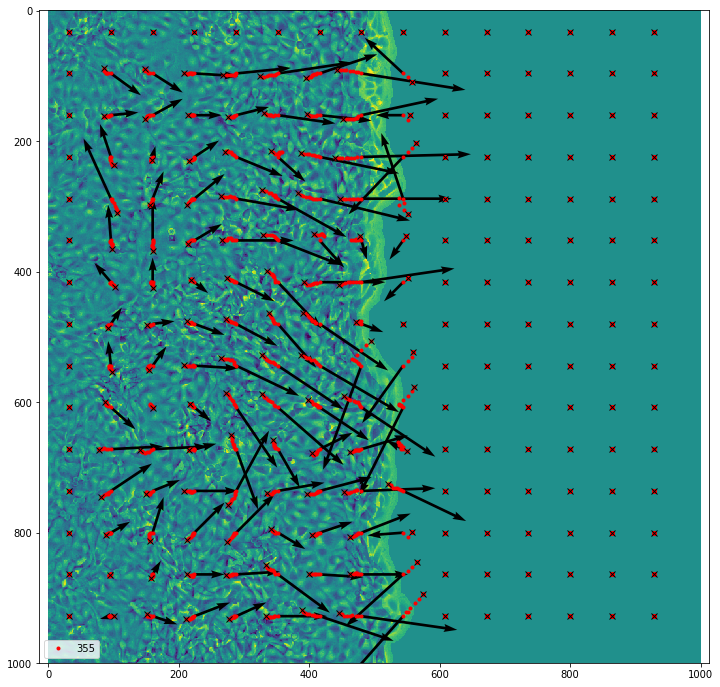

In [282]:
idx = np.random.uniform(0,35*35,size=(4,1)).astype(np.int)
idx=[355]
#idx = np.where(pos[idx,:,0]<)
plt.figure(figsize=(12,12))
p = np.reshape(pos, (gx*gy,nt,2))
vel = pos[:,:,-1,:] - pos[:,:,0,:]
plt.quiver(wx/2+pos[:,:,0,1], wx/2+pos[:,:,0,0], -vel[:,:,1], vel[:,:,0])
plt.plot(wx/2+p[:,:,1].squeeze().transpose(), wx/2+p[:,:,0].squeeze().transpose(),'r.')
plt.plot(wx/2+p[:,-1,1].squeeze().transpose(), wx/2+p[:,-1,0].squeeze().transpose(),'kx')
#im1 = plt.imread('/Users/timrudge/CavendishMicroscopy/10.01.16/Pos0000/Frame0/Frame0000_regStep%04d.tif'%150).astype(np.float32)
#im = plt.imread('/Users/timrudge/cellmodeller/data/weiner-17-12-07-17-56/step-%05d.jpg'%230).astype(np.float32)
#im2 = plt.imread('/Users/timrudge/CavendishMicroscopy/10.01.16/Pos0000/Frame0/Frame0000_regStep%04d.tif'%151).astype(np.float32)
im1 = plt.imread('/Users/timrudge/AndreaRavasioData/masked image/%02d.tif'%10).astype(np.float32)
im2 = plt.imread('/Users/timrudge/AndreaRavasioData/masked image/%02d.tif'%19).astype(np.float32)


plt.imshow(im2-im1)
plt.axis('equal')

print idx
plt.legend(idx)

#plt.figure()
#ll = ll.reshape((17*29,50,15,15))
#plt.imshow(ll[400,1,:,:])


In [ ]:
#im1 = plt.imread('/Users/timrudge/CavendishMicroscopy/10.01.16/Pos0000/Frame0/Frame0000_regStep%04d.tif'%250).astype(np.float32)
im1 = plt.imread('/Users/timrudge/cellmodeller/data/weiner-17-12-07-17-56/step-%05d.jpg'%180).astype(np.float32)
#im2 = plt.imread('/Users/timrudge/CavendishMicroscopy/10.01.16/Pos0000/Frame0/Frame0000_regStep%04d.tif'%150).astype(np.float32)
im2 = plt.imread('/Users/timrudge/cellmodeller/data/weiner-17-12-07-17-56/step-%05d.jpg'%150).astype(np.float32)
w,h = im1.shape
plt.figure(figsize=(18,18))
rgb = np.zeros(im1.shape+(3,))
rgb[:,:,0] = im1/np.max(im1, axis=(0,1))
rgb[:,:,1] = im2/np.max(im2, axis=(0,1))
#plt.imshow(im1)
#plt.plot(pos[:,0:-1:5,1].transpose(),pos[:,0:-1:5,0].transpose(),'.-')
#plt.plot(pos[:,-1,1].transpose(),pos[:,-1,0].transpose(),'wx')


print np.max(im2, axis=(0,1))
_,nt,_ = pos.shape
for t in range(1,nt):
    plt.figure(figsize=(12,12))
    im1 = plt.imread('/Users/timrudge/cellmodeller/data/weiner-17-12-07-17-56/step-%05d.jpg'%((nt-t)*2+150)).astype(np.float32)
    im2 = plt.imread('/Users/timrudge/cellmodeller/data/weiner-17-12-07-17-56/step-%05d.jpg'%((nt-t-1)*2+150)).astype(np.float32)

    #im1 = plt.imread('/Users/timrudge/CavendishMicroscopy/10.01.16/Pos0000/Frame0/Frame0000_regStep%04d.tif'%((nt-t)*2+100)).astype(np.float32)
    #im2 = plt.imread('/Users/timrudge/CavendishMicroscopy/10.01.16/Pos0000/Frame0/Frame0000_regStep%04d.tif'%((nt-t-1)*2+100)).astype(np.float32)

    plt.subplot(1,2,1)
    
    plt.imshow(im1)
    '''
    px = pos[:,:,t,1]
    py = pos[:,:,t,0]
    vy = pos[:,:,t+1,1]-pos[:,:,t,1]
    vx = pos[:,:,t+1,0]-pos[:,:,t,0]
    '''
    #plt.plot([pos[:,t,1],pos[:,t-1,1]],[pos[:,t,0],pos[:,t-1,0]], 'r-')
    vel = pos[:,t,:]-pos[:,t-1,:]
    mvel = np.sqrt(vel[:,0]**2 + vel[:,1]**2)
    idx = np.where(mvel>=0)
    
    plt.title(np.max(mvel))
    #plt.plot(pos[idx,t,1],pos[idx,t,0], 'r.')
    plt.quiver(pos[idx,t,1], pos[idx,t,0], -vel[idx,1], vel[idx,0], scale=100) #0.00001,0.00001)
    
    plt.subplot(1,2,2)
    plt.imshow(im2)
    plt.plot(pos[idx,t-1,1],pos[idx,t-1,0], 'r.')

    plt.savefig('plotim%4d.png'%t)
    
    #, scale=0.001)
    


In [ ]:
roi = np.fromfile(open('/Users/timrudge/Code/InfoTracking/roi.np','rt'), sep=',')
print roi.shape
print 64*64*20*17*29

In [ ]:
roi = roi.reshape((17,29,50,64,64))

In [ ]:
pos = pos.reshape((17,29,20,2))
for t in range(20):
    plt.figure()
    plt.imshow(roi[11,14,t,:,:])
    print pos[11,14,t,:]